<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Intro2DataScienceI/Intro2DataSC_ASSIG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Alvaro Rivera-Eraso"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_

*The categories most likely to survive the accident were: females, people with no spouse, or no siblings. People with one sibling, people in medium or standard P-class, some ages between 20 to 30, and another group of people between 30 to 40 years old. *

* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 

It is in the book in each part of the book. 

* Provide a complete list of all attributes used.

I did use many different graphics in seaborn, I used statistical imputation, shaping, describing, variable recoding, variable dropping, missingno matrix visualization, null count and null sum, density plot, Shapiro Wilk and Kolmogorov tests, box-cox transformations, sqrt, exponential transformation, logarithmic transformation, reciprocal transformations. 

I used pd.cut to create categories and df.loc to relocate data.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

All third point is in the markdown with the explanation of why I did each part. 

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

This last part is in the markdown too, please check the book and read the description. I detailed each part of the analysis.

<h1><Center>
***`I will write text to explain every step I do and the justification for each step and its meaning. `***
</Center></h1>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')     

Pclass: ticket class 1=First class, 2=Second class, 3= Thidr class. 
Sibsp:Number of siblings or spouses.
Parch: Number of parents or childrens


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /week4/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now, I want to have an idea about the data frame and how it compounds, so I will run a describe. 

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I ran a describe for the survived variable to understand it.

In [ ]:
df.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
df.shape

(891, 12)

Now, I want to:

1. I will recode some variables to work with it in the future.
2. I will drop the name and the ticket variables, because I dont think its usefull to work with this information. (at least not for now)
3. I will print my df1 to check if everything worked as I expected. 

In [ ]:
#Make another copy of the dataframe, it will be my df1
df1 = df.copy()
df1.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)
df1.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)
df1.loc[:,'Pclass'].replace([1,2,3],['Standar','Medium','VIP'],inplace=True)
df1.drop('Name', axis=1, inplace= True)
df1.drop('Ticket', axis=1, inplace= True)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agex
0,1,No,VIP,male,22.0,1,0,7.2500,Southampton,3
1,2,Yes,Standar,female,38.0,1,0,71.2833,Cherbourg,4
2,3,Yes,VIP,female,26.0,0,0,7.9250,Southampton,3
3,4,Yes,Standar,female,35.0,1,0,53.1000,Southampton,4
4,5,No,VIP,male,35.0,0,0,8.0500,Southampton,4
...,...,...,...,...,...,...,...,...,...,...
886,887,No,Medium,male,27.0,0,0,13.0000,Southampton,3
887,888,Yes,Standar,female,19.0,0,0,30.0000,Southampton,2
888,889,No,VIP,female,28.0,1,2,23.4500,Southampton,3
889,890,Yes,Standar,male,26.0,0,0,30.0000,Cherbourg,3


Now I will take a look of how all the information is compound in a graphic way; this, in order to see if there are some missing information around any variable. 

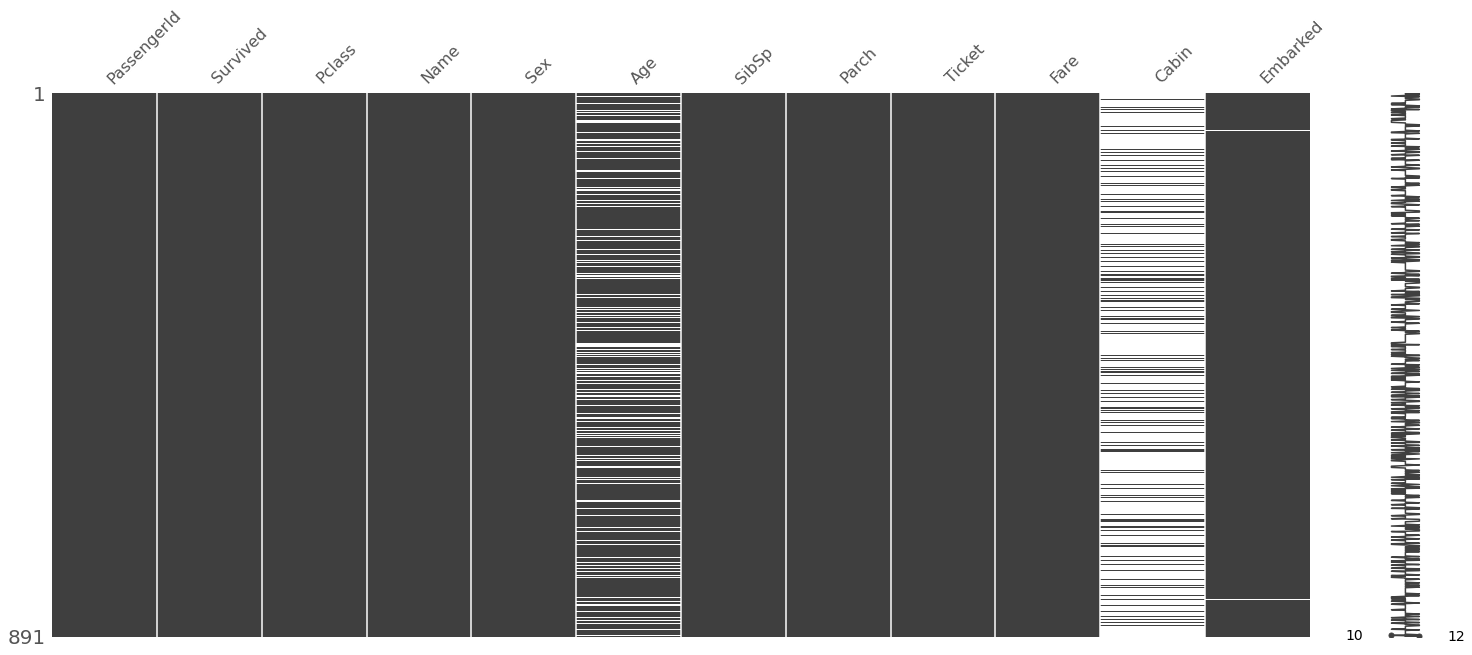

In [ ]:
import missingno
missingno.matrix(df)

I see that Age and Cabin has lots of NAs so I will need to work with those variables. In order to understand how properly work with it I will need to sum my null data in each variable to know how many observations I will need to impute or ignore.

In [ ]:
b=df.isnull().sum()['Embarked']
c=df.isnull().sum()['Cabin']
d=df.isnull().sum()['Age']
print(b,c,d)

2 687 177


Now I know that the Cabin variable is almost lost so I think I will ignore this one or work with the "not null" observations. But I'm going to decide this further. 

The Age variable has 177 null observations, so I will make an imputation with this one. Using the mean, I will impute the variable to replace the missing values with this number. 
 
Finally, I think that the two missing observations for the Embarked variable are not extremely important so I can just ignore them. 

In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)  
  

Once I've done the imputation, I'm going to check again in the same graphical way I did in the past step. 

I decided that I will ignore the cabin variable because I have much-lost information and I consider that will be hard to work with this one. 

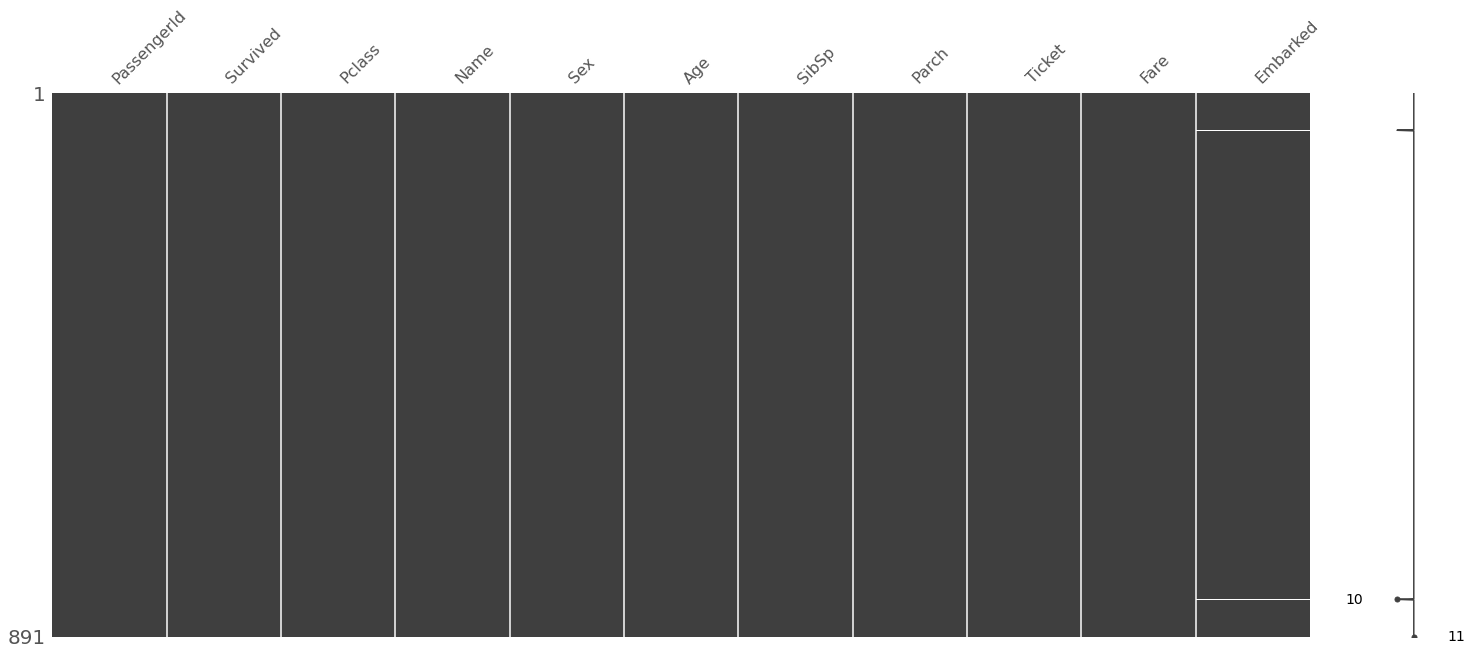

In [ ]:
df.drop('Cabin', axis=1, inplace= True)
missingno.matrix(df)

Good, the work is done, and now I have tidy data, so now I will start taking a look at the relation of every variable with the surviving variable.

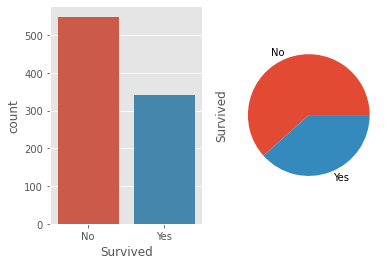

In [ ]:
ax=plt.figure()
ax.add_subplot(121)
sns.countplot(x='Survived',data=df1)
ax.add_subplot(122)
df1.Survived.value_counts().plot(kind='pie')

 First, I will take a look at the number of people that survived the accident. 

Now, it is possible to observe that more than 500 people didn't survive the accident and approx 350 survived. Let's take a look a little bit deeper into the data. 

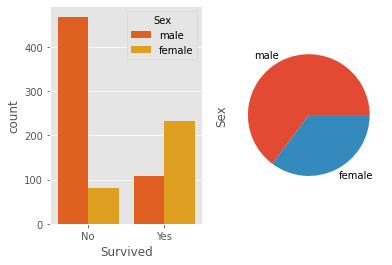

In [ ]:
ax=plt.figure()
ax.add_subplot(121)
sns.countplot(x='Survived',hue='Sex',data=df1,palette='autumn')
ax.add_subplot(122)
df1.Sex.value_counts().plot(kind='pie')

Well, I've done a mixed graphic; in the left barplot, it's possible to observe the relation between the survived variable and the sex variable. The graphic is split into two colors, one for each sex, male and female. 

It seems that about 500 males died in the accident, and less than 100 women died this same day. 

On the other hand, more than 200 females survived, but only 100-110 males survived the accident.  

Additionally, on the right pieplot, I generated a visualization in which is possible to compare the proportion of males and females in the boat.

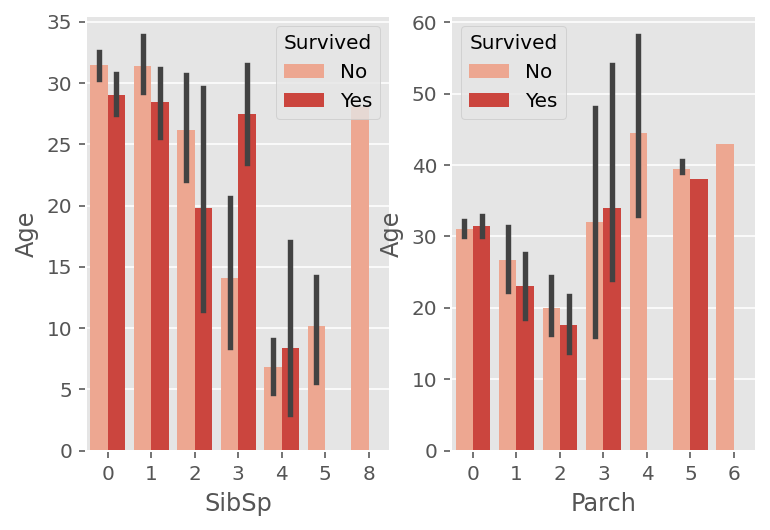

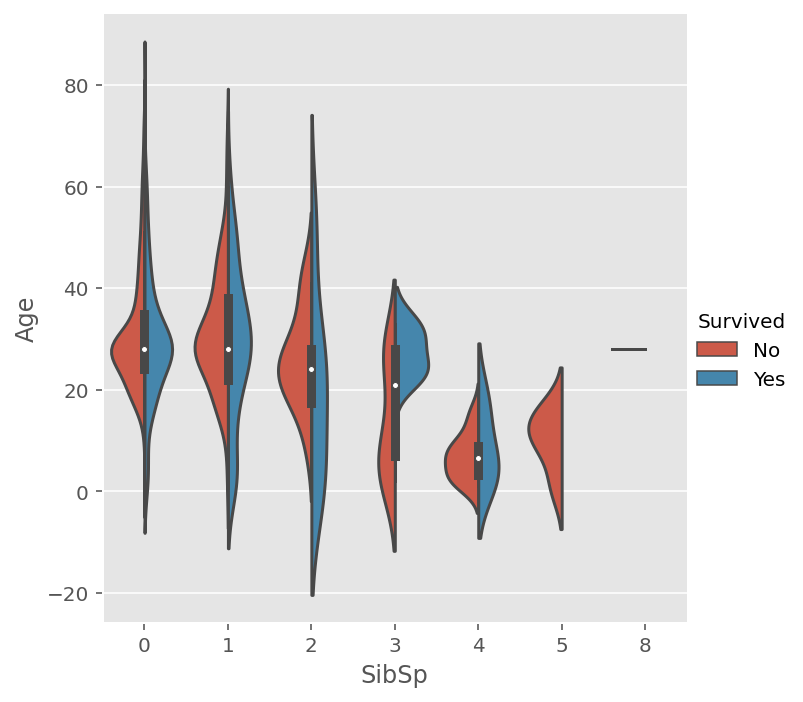

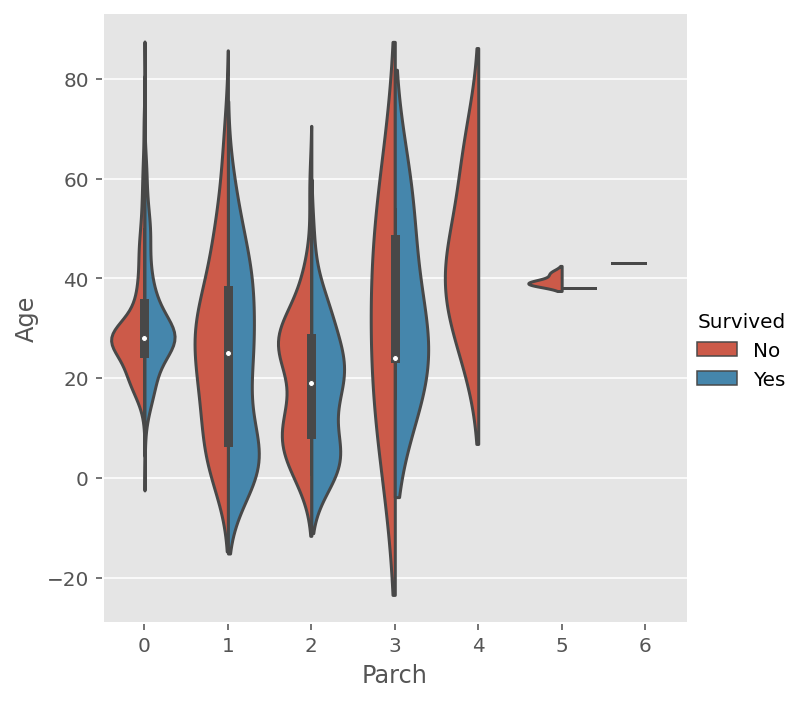

In [ ]:
ax=plt.figure()
ax.add_subplot(121)
sns.barplot(y=df1['Age'],x=df1['SibSp'],hue = df1['Survived'], palette='Reds')
ax.add_subplot(122)
sns.barplot(y=df1['Age'],x=df1['Parch'],hue = df1['Survived'], palette='Reds')
#sns.catplot(data=df1,x="SibSp", y="Age",hue ="Survived", kind="swarm", split=True)
sns.catplot(data=df1,x="SibSp", y="Age",hue ="Survived", kind="violin", split=True)
#sns.catplot(data=df1,x="Parch", y="Age",hue ="Survived", kind="swarm", split=True)
sns.catplot(data=df1,x="Parch", y="Age",hue ="Survived", kind="violin", split=True)

Here, I have created 4 graphics: The first two are the comparison between siblings or spouses, the age, and the survived variable (the left plot), which shows that there was a big number of people approximately 30 years old, that was single and had no siblings that died this day, but there is a big portion of people with 30 years old with 1 spouse or a sibling that died. 

It is interesting to highlight two groups of people. The first one is a group of people that survived. They were around 27 years old and had 3 siblings. 

The other group didn't survive and had approximately 8 siblings. 

On the right graphic, it's possible to see the information on the age, the number of parents or children, and the survived variable. 

It is possible to see that contrariously with the siblings the age range where more people died is between 35 to 60 years old; and in these ranges, there was a big portion of people with 3, 4, 5, and 6 children.

There was a little portion of young adults approx 20 years old and 2 children that died and another little portion of parents 18 years old and two children that died in the accident.

Finally, the next violin graphics I have created are the same ones that are upper, but in this case, the violin graphic helps to see the distribution and the quartiles of the survived variable for each age and the siblings and children.

Personally, I consider that there are some of the most affected variables in the accident. Many parents and brothers died on this day. 

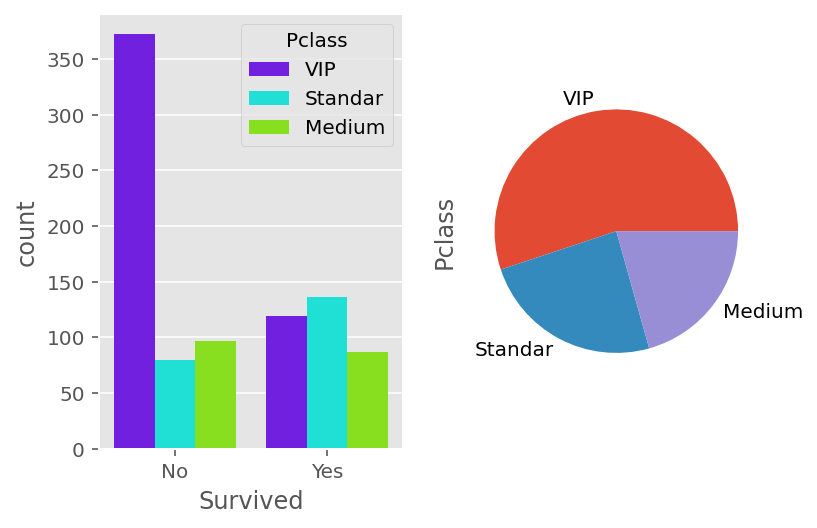

In [ ]:
ax=plt.figure()
ax.add_subplot(121)
sns.countplot(x='Survived',hue='Pclass',data=df1,palette='hsv_r')
ax.add_subplot(122)
df1.Pclass.value_counts().plot(kind='pie')

Now, in this set of graphics, I have created another mix. In the right graphic, it is the relation between the Pclass variable and the survived variable in which it's possible to see that more than 350 people in the VIP class didn't survive the accident, which is pretty surprising. In fact, there are no more big numbers, it seems that a big number of VIP were in a place on the boat where was impossible to save them or they voluntarily decided to save others by giving their own lives.

In the right graphic, there is a count of the 3 categories in the boat in order to clarify the numbers to the reader. 

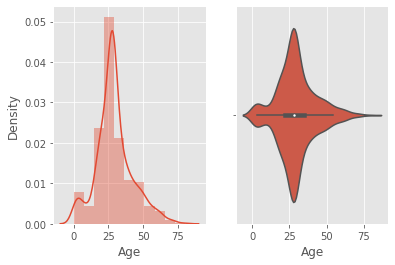

In [ ]:
#here I am trying to plot the distribution of the Age, to see if it is or not normal
ax=plt.figure()
ax.add_subplot(121)
sns.distplot(df['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(df['Age']);



Now, I want to plot the distribution of the Age variable to see if it is a normal distribution.

In [ ]:
#Not normal distibution for AGE
from scipy.stats import shapiro
stat, P_value = shapiro(df['Age'])
print('stat= %.5f, P_value=%.5f' % (stat, P_value)) 
#%.3f para valores de punto flotante con 3 decimales. 
#Kolmogorov
stats.kstest(df['Age'], 'norm')

stat= 0.95410, P_value=0.00000


KstestResult(statistic=0.971714075032343, pvalue=0.0)

The hypothesis was: if P>0.05 it is a normal​ dist and if P<=0.05, it is NOT a normal​ dist. 

There are some authors that say the Shapiro Wilk is a more sensitive test so usually with more than 50 observations is better to do Kolmogorov.

I decided to run both tests Shapiro Wilk and Kolmogorov Smirnov. Both of them confirm the same result; that age is not a normal distribution.

Based on that information I tried to transform the variable in order to work with it as a normal one. 

First, I tried with Box-cox transformation, but it seems to now work so well, so I decided to try with the other 4 transformations more without the expected result.

In [ ]:
#I run Box-cox transformation over the Age variable.
fitted_data, fitted_lambda = stats.boxcox(df['Age'])


In [ ]:
stat, P_value = shapiro(fitted_data)
print('P_value=%.3f' % (P_value)) 
stats.kstest(fitted_data, 'norm')

P_value=0.000


KstestResult(statistic=0.9606581467677484, pvalue=0.0)

I ran the test to see if the box-cox transformation worked, but it didn't... because the hypothesis tests show the same results, the P-value is the same as before.

4 more transformations... 

In [ ]:
from sklearn.preprocessing import PowerTransformer
a=df['Age'].transform([np.sqrt,np.exp,np.log,np.reciprocal])
print(a)

         sqrt           exp       log  reciprocal
0    4.690416  3.584913e+09  3.091042    0.045455
1    6.164414  3.185593e+16  3.637586    0.026316
2    5.099020  1.957296e+11  3.258097    0.038462
3    5.916080  1.586013e+15  3.555348    0.028571
4    5.916080  1.586013e+15  3.555348    0.028571
..        ...           ...       ...         ...
886  5.196152  5.320482e+11  3.295837    0.037037
887  4.358899  1.784823e+08  2.944439    0.052632
888  5.291503  1.446257e+12  3.332205    0.035714
889  5.099020  1.957296e+11  3.258097    0.038462
890  5.656854  7.896296e+13  3.465736    0.031250

[891 rows x 4 columns]


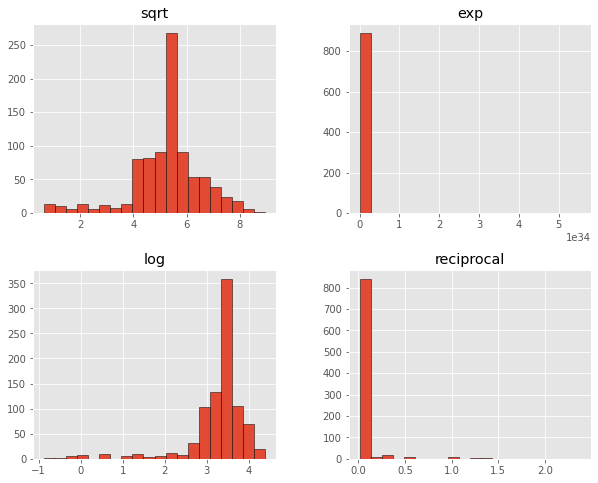

In [ ]:
a.hist(bins=20, layout=(2,2),edgecolor='k',figsize=(10,8))
plt.show()

No one of the graphics seems to show anything like a normal distribution so I will continue with the variable as it is.

The normality test doesn't show anything good to deal with.

In [ ]:
c=df['Age'].transform([np.sqrt])
stat, P_value = shapiro(c)
print('P_value=%.3f' % (P_value)) 
stats.kstest(c, 'norm')

P_value=0.000


KstestResult(statistic=1.0, pvalue=0.0)

Ok, I understood that my variable Age is not transformable to a normal distribution so, what I gonna do is split the variable into different groups in order to convert it into a categorical one.

In [ ]:
df1["Age"].fillna(df1["Age"].median(), inplace=True)
AgeG=['0-10', '10-20', '20-30','30-40','40-50','50-60','60-70','70-80']
Agess= pd.cut(df1.Age,range(0,81,10),right=False,labels=AgeG)
df1.loc[:,'Agess'] = Agess
df1.loc[df1['Age']>=80, 'Agess'] = '70-80'
obs_tablee = pd.crosstab([df1['Survived']],[df1['Agess']])
obs_tablee

Agess,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80
Survived,,,,,,,,
No,24,61,268,94,55,28,13,6
Yes,38,41,129,73,34,20,6,1


Now, I have my categories organized, I'm going to do a Chi-square test to see if there is a relation between the mean of the two variables and see if there are any relation between them.

In [ ]:
#Compute Chi2 statistic
chi2, p, dof, expected = chi2_contingency(obs_tablee)
print('chi2=%.3f, dof=%.1f, p=%.3f' % (chi2, dof, p))

chi2=24.036, dof=7.0, p=0.001


Spicy, it seems that there is a relation between the age at the survived variable, but I will try the same result with a U test which I consider is more powerful seeing the variance in the median of them.

For this purpose, I'm going to split the age variable into numerical categories. (I could did it with the normal Age variable but when I realized it, I had already done it with the categorical one so... late for me.)

In [ ]:
AgeP=['1', '2', '3','4','5','6','7','8']
Agex= pd.cut(df.Age,range(0,81,10),right=False,labels=AgeP)
df.loc[:,'Agex'] = Agex
df.loc[df['Age']>=80, 'Agex'] = '8'
obs_tablee = pd.crosstab([df['Survived']],[df['Agex']])
import scipy
y=df['Survived'].astype(int)
x=df['Agex'].astype(int)
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')


MannwhitneyuResult(statistic=783279.0, pvalue=1.451868015572052e-292)

According to the P-value, it seems to be a relation between the Survived variable and the Age. 

There are some differences in the tests so the P-values are a little bit different from one other, but both have shown a relation. 

[Text(0, 0.5, 'Number of people'), Text(0.5, 0, 'Age')]

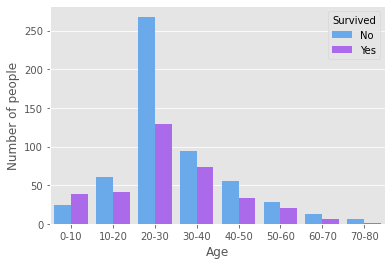

In [ ]:
ax=sns.countplot(x='Agess',hue='Survived',data=df1,palette='cool')
ax.set(xlabel='Age', ylabel='Number of people')

Finally, I decided to do a graphic to show the relation between age and the survived variable. On it, the reader will see that young adults between 20 to 40 years old are the part of the population that died and survived more the accident. But, there is a really big number, approx 280 people 20 years old that died the day of the accident. 

On the other hand, there is another notorious number of people, approximately 130 people that survived this day. 

I consider that this big number of young adults that died and survived the accident are making a tendency that is notorious in the chi2 test and in the U-test too and this is the reason why it seems to be a relation between age and survived variable. 

From this part evrything are notes for me... my own notes to learn how to do new things I ever did so:

 
***
THIS IS NOT PART OF THE ASSIGNMENT 2. 

THIS IS NOT PART OF THE ASSIGNMENT 2.

THIS IS NOT PART OF THE ASSIGNMENT 2.

THIS IS NOT PART OF THE ASSIGNMENT 2.

THIS IS NOT PART OF THE ASSIGNMENT 2.

THIS IS NOT PART OF THE ASSIGNMENT 2.

THIS IS NOT PART OF THE ASSIGNMENT 2.
***

In [ ]:
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
#x=not_missingEMB['Survived']
#y=not_missingEMB['Embarked']
#sns.pairplot(df.select_dtypes(['number']), hue = 'Survived', palette='Oranges')

In [ ]:
#Make a dataframe for non missing 'Age' values
not_missing = df[(df['Age'].notnull())] 
not_missing.isnull().sum() #check if it worked or not ---> check, it worked!


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Agex           0
dtype: int64

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm


In [ ]:
# Datos
# ==============================================================================

datos = y

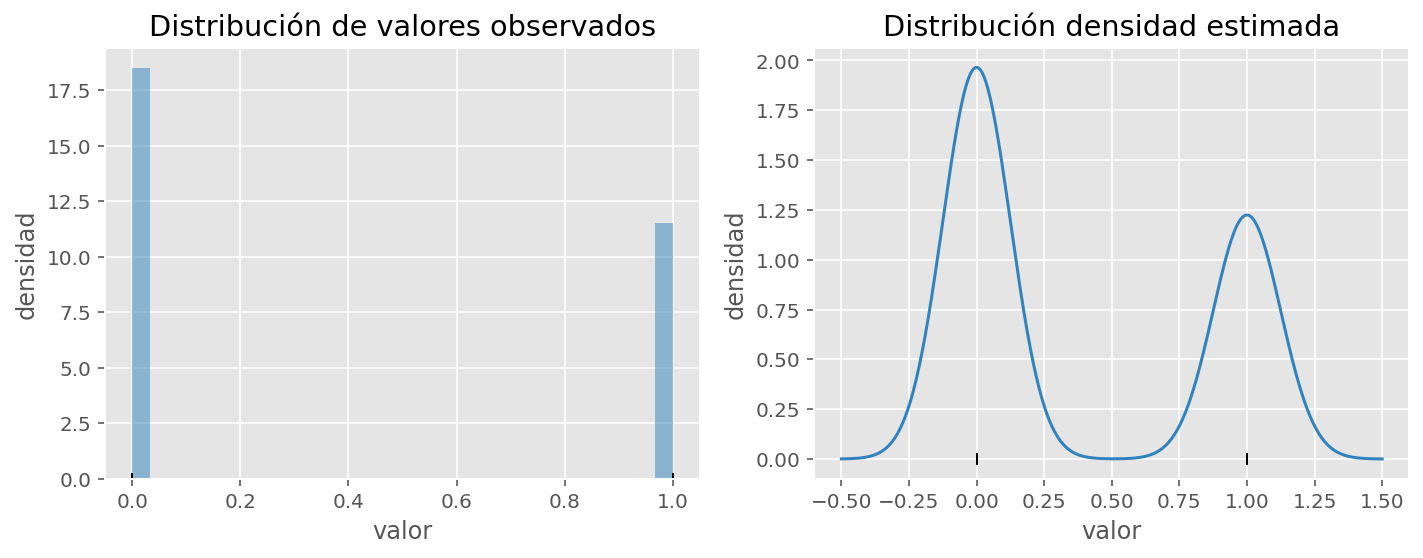

In [ ]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(datos, bins=30, density=True, color='#3182bd', alpha=0.5, label = 'muestra_1')
axs[0].plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de valores observados')
axs[0].set_xlabel('valor')
axs[0].set_ylabel('densidad')

pd.Series(datos).plot.kde(ax=axs[1],color='#3182bd')
axs[1].plot(datos, np.full_like(datos, 0), '|k', markeredgewidth=1)
axs[1].set_title('Distribución densidad estimada')
axs[1].set_xlabel('valor')
axs[1].set_ylabel('densidad')

fig.tight_layout();

In [ ]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.median(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante muestreo repetido con reposición (bootstrapping).
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [ ]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 10747.54it/s]


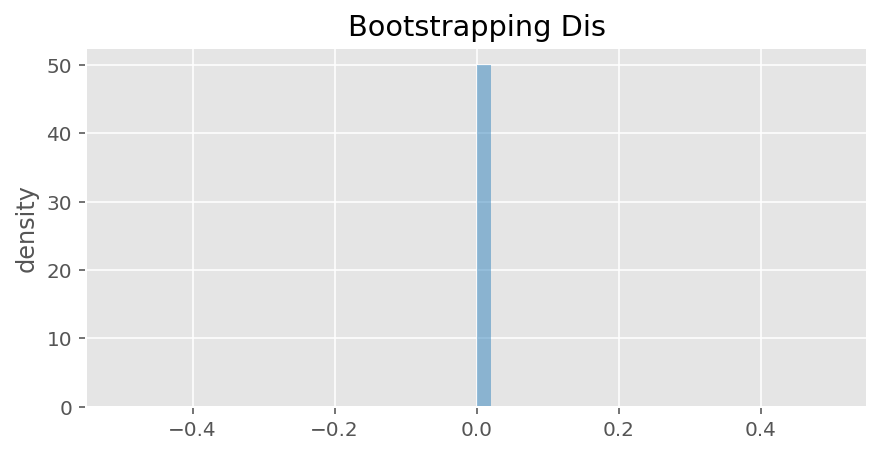

In [ ]:
# Distribución de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=50, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Bootstrapping Dis')
ax.set_ylabel('density');

In [ ]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Interval  based on percentils')
print('-------------------------------')
print(cuantiles)

-------------------------------
Interval  based on percentils
-------------------------------
[0. 0.]


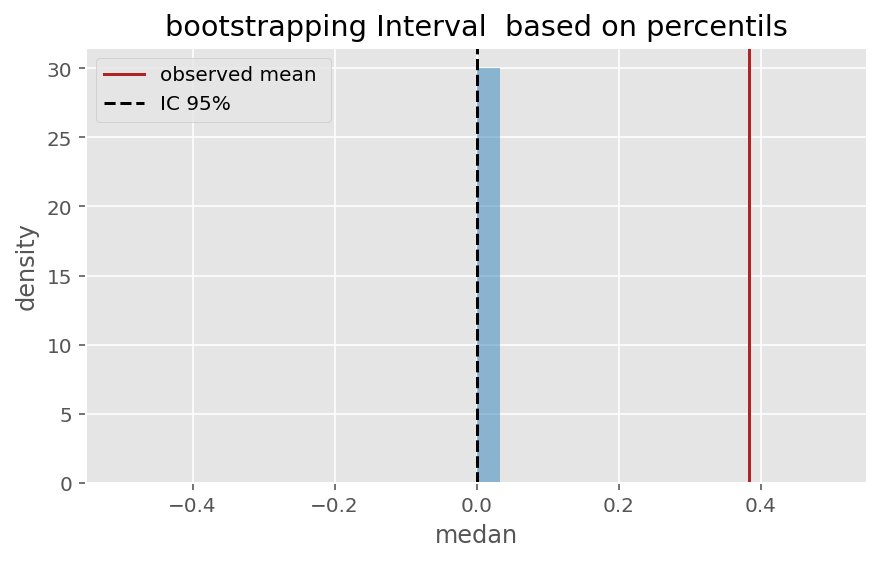

In [ ]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=datos.mean(), color='firebrick', label='observed mean ')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('bootstrapping Interval  based on percentils')
ax.set_xlabel('medan')
ax.set_ylabel('density')
ax.legend();

Gotta work on this one. 

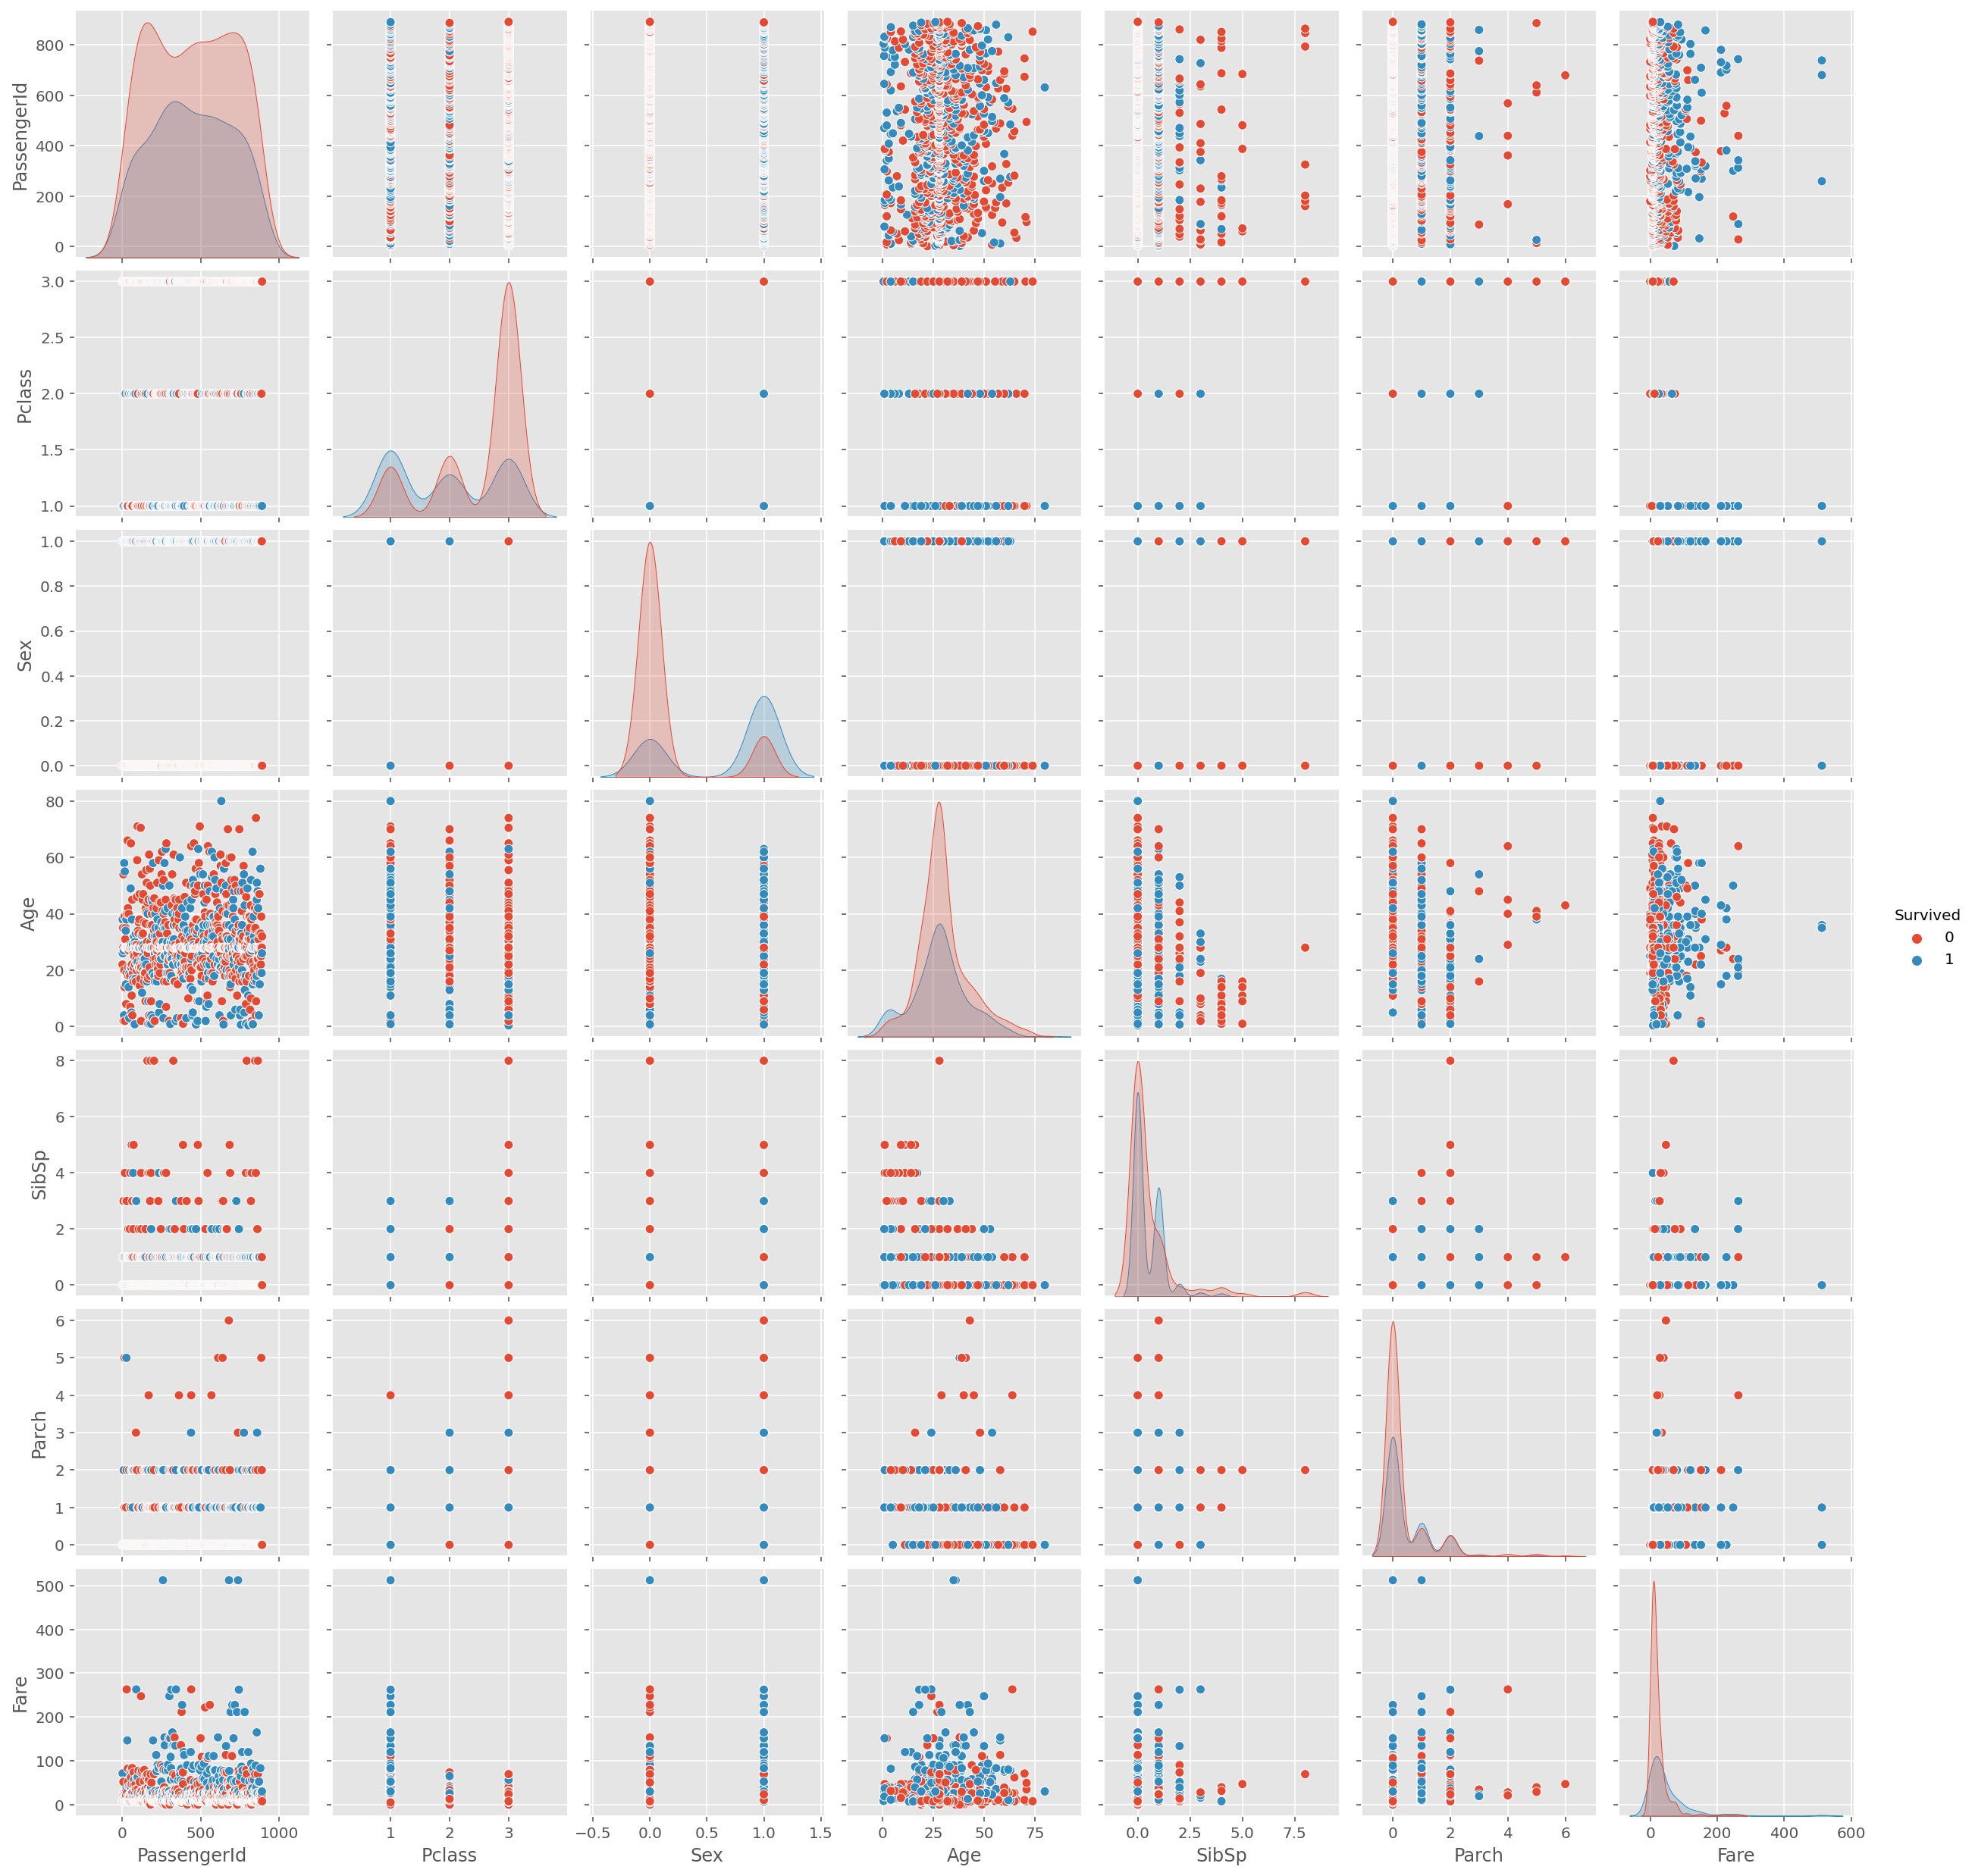

In [ ]:
df2 = df.copy()
df2.loc[:,'Embarked'].replace(['C','S','Q'],['1','2','3'],
                                      inplace=True)
df2.loc[:,'Survived'].replace(['No','Yes'],[0,1],inplace=True)
df2.loc[:,'Pclass'].replace(['Standar','Medium','VIP'],[1,2,3],inplace=True)
df2.loc[:,'Sex'].replace(['male','female'],[0,1],inplace=True)
df2.drop('Name', axis=1, inplace= True)
df2.drop('Ticket', axis=1, inplace= True)
df2
sns.pairplot(data=df2, hue="Survived")